### Minha proposta de solução 

In [388]:
import pandas as pd

In [389]:
import numpy as np 

In [390]:
import math

In [391]:
import missingno

In [392]:
import statistics

In [393]:
from datetime import datetime

In [394]:
lista_labels_valores_ausentes= [['n/a', 'na', 'undefined' ]]

In [395]:
dataset = pd.read_csv('/Users/izadoraramos/Desktop/DataScienceAcademy/projeto4/dataset.csv')

In [396]:
dataset_copy = dataset 
dataset_copy

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [397]:
dataset_copy.shape

(45211, 19)

### Análise Exploratória

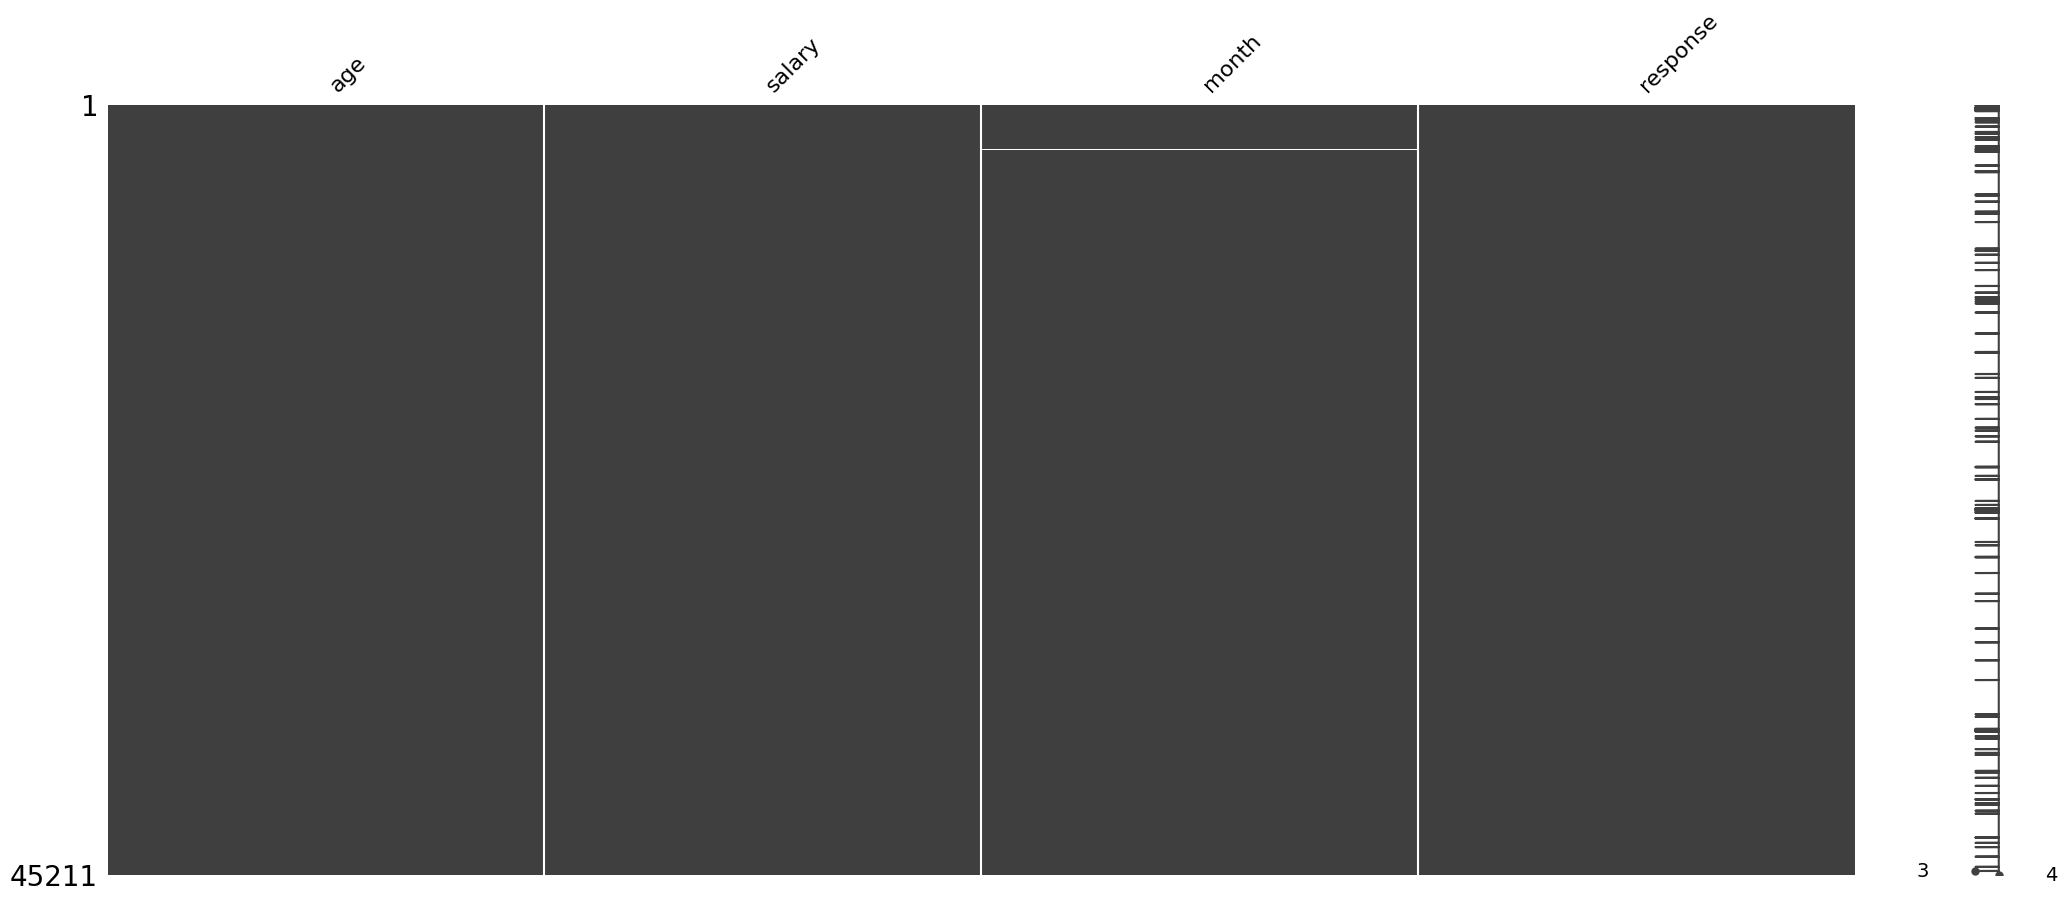

In [398]:
# Gera a visualização
#Para ver se existe um padrão nos valores ausentes

#DataFrame 
df_nan = pd.DataFrame(dataset_copy.isna().sum())

#Plot mapa de valores ausentes 
if dataset_copy.isna().any(axis=None):
    missingno.matrix(dataset_copy[df_nan[df_nan[0]>0].index])

In [399]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [400]:
# Calculando o percentual de valores ausentes 
TotalCells = np.product(dataset_copy.shape)
TotalMissingCount = (dataset_copy.isnull().sum()).sum()
round(((TotalMissingCount/TotalCells) * 100),4)


0.0147

In [401]:
# Criar tabela com os valores ausentes linha
def func_calc_percentual_valores_ausentes_coluna(df):
    # Total de valores ausentes
    mis_val = df.isnull().sum()

    # Porcentagem de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)

    # Tipo de dado das colunas com valores ausentes
    mis_val_dtype = df.dtypes

    # Cria uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Renomear as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    # Print 
    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return
    
    # Retorna o dataframe com informações ausentes
    return mis_val_table_ren_columns
    
    
df_missing = func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 4 colunas que têm valores ausentes.


In [402]:
df_missing
# Como nenhuma coluna tem mais de 30% de valores ausentes não vou dropar nenhuma 

,Valores Ausentes,% de Valores Ausentes,Dtype
month,50,0.11,object
response,30,0.07,object
salary,26,0.06,float64
age,20,0.04,float64


In [403]:
# Verificar se seguem uma distribuição normal 
dataset_copy['salary'].skew(skipna=True)

0.13767483033054806

In [404]:
dataset_copy['age'].skew(skipna=True)

0.6850014193798112

- Se a assimetria estiver entre -0,5 e 0,5, os dados são bastante simétricos
- Se a assimetria estiver entre -1 e - 0,5 ou entre 0,5 e 1, os dados estão moderadamente inclinados
- Se a assimetria for menor que -1 ou maior que 1, os dados estão altamente enviesados
Visto que os dados da variável 'salary' tem skew de 0.13, são normais o suficiente para imputar a média nos valores ausentes. 
Já os dados da variável 'age por terem skew de 0.68 são moderadamente inclinados, então vou adotar a estratégia de imputar a mediana. 

In [405]:
mean_salary = math.floor(dataset_copy['salary'].mean())
mean_salary

57008

In [406]:
#Preenchimento de valores ausentes em salary com a média 
nan_index = (dataset_copy[(dataset_copy['salary'].isna())]).index
nan_index

Int64Index([   35,    60,   169,   203,   230,   256,   282,   305,   321,
              331,   359, 23686, 23695, 23705, 23735, 23758, 23784, 23837,
            36631, 36652, 36665, 36688, 36717, 36739, 36771, 36797],
           dtype='int64')

In [407]:
# Imputação 
dataset_copy['salary'][nan_index] = mean_salary

/var/folders/z4/l__b_djs0ddcy2c2gb7ywn7m0000gn/T/ipykernel_54480/3439098217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['salary'][nan_index] = mean_salary


In [408]:
dataset_copy['salary'].unique()

array([100000.,  60000., 120000.,  20000.,      0.,  55000.,  50000.,
        70000.,  57008.,   8000.,  16000.,   4000.])

In [409]:
#Sem nenhum NaN
dataset_copy['salary'].isna().notna().all()

True

In [410]:
median_age = dataset_copy['age'].median()
median_age

39.0

In [411]:
dataset_copy['age'].unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., 23., 26., nan,
       61., 22., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64.,
       69., 72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80.,
       94., 79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.])

In [412]:
#Preenchimento de valores ausentes em salary com a média 
nan_index = dataset_copy[(dataset_copy['age'].isna())].index
nan_index

Int64Index([  161,  1021,  1585,  3943,  5675,  6873,  9692, 11653, 13417,
            14541, 17159, 19457, 23483, 23939, 26531, 35920, 40757, 40994,
            43573, 44974],
           dtype='int64')

In [413]:
len(nan_index)

20

In [414]:
# Imputação 
dataset_copy['age'][nan_index] = median_age

/var/folders/z4/l__b_djs0ddcy2c2gb7ywn7m0000gn/T/ipykernel_54480/415812150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['age'][nan_index] = median_age


In [415]:
#Sem nenhum NaN
dataset_copy['age'].isna().notna().all()

True

In [416]:
func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
month,50,0.11,object
response,30,0.07,object


In [417]:
dataset_copy['age'] = dataset_copy['age'].astype('int')

In [418]:
# Tratando os valores ausentes da variável month
dataset_copy['month'].unique()

array(['may, 2017', nan, 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

In [419]:
dataset_copy['month'].value_counts(dropna=False)

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
NaN             50
Name: month, dtype: int64

In [420]:
mode_month = statistics.mode(dataset_copy['month'])
mode_month 

'may, 2017'

In [421]:
#Preenchimento de valores ausentes em month com a moda
nan_index = dataset_copy[(dataset_copy['month'].isna())].index
nan_index

Int64Index([  189,   769,   860,  1267,  1685,  1899,  2433,  2612,  2747,
             3556,  3890,  5311,  6265,  6396,  8433,  8792, 10627, 11016,
            11284, 11394, 14502, 15795, 16023, 16850, 17568, 18431, 18942,
            19118, 19769, 21777, 21962, 23897, 25658, 27480, 28693, 30740,
            31551, 35773, 37194, 37819, 38158, 39188, 41090, 41434, 41606,
            43001, 43021, 43323, 44131, 44732],
           dtype='int64')

In [422]:
len(nan_index)

50

In [423]:
dataset_copy['month'][nan_index] = mode_month

/var/folders/z4/l__b_djs0ddcy2c2gb7ywn7m0000gn/T/ipykernel_54480/1237644207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['month'][nan_index] = mode_month


In [424]:
func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
response,30,0.07,object


In [425]:
# Conveter essa a variável month para datetime 
dataset_copy['month'] = pd.to_datetime(dataset_copy['month'], format='%b, %Y').dt.to_period('M').dt.to_timestamp()
dataset_copy

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,"technician,tertiary",yes,no,no,no,cellular,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,2017-11-01,7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,"retired,secondary",yes,no,no,no,cellular,17,2017-11-01,18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,no


In [426]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   customerid  45211 non-null  int64         
 1   age         45211 non-null  int64         
 2   salary      45211 non-null  float64       
 3   balance     45211 non-null  int64         
 4   marital     45211 non-null  object        
 5   jobedu      45211 non-null  object        
 6   targeted    45211 non-null  object        
 7   default     45211 non-null  object        
 8   housing     45211 non-null  object        
 9   loan        45211 non-null  object        
 10  contact     45211 non-null  object        
 11  day         45211 non-null  int64         
 12  month       45211 non-null  datetime64[ns]
 13  duration    45211 non-null  object        
 14  campaign    45211 non-null  int64         
 15  pdays       45211 non-null  int64         
 16  previous    45211 non-

In [427]:
# Não tem como imputar a variável resposta. Dropamos. 
dataset_copy = dataset_copy.dropna()

In [428]:
func_calc_percentual_valores_ausentes_coluna(df=dataset_copy)

O dataset tem 19 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [429]:
dataset_copy['job'] = dataset_copy['jobedu'].str.split(',').str[0]

/var/folders/z4/l__b_djs0ddcy2c2gb7ywn7m0000gn/T/ipykernel_54480/2959556505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['job'] = dataset_copy['jobedu'].str.split(',').str[0]


In [430]:
dataset_copy['edu'] = dataset_copy['jobedu'].str.split(',').str[1]

/var/folders/z4/l__b_djs0ddcy2c2gb7ywn7m0000gn/T/ipykernel_54480/2991451194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['edu'] = dataset_copy['jobedu'].str.split(',').str[1]


In [431]:
dataset_copy.columns.tolist()

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'job',
 'edu']

In [432]:
nova_ordem = ['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'edu',
 'job',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 ]

dataset_copy = dataset_copy.reindex(columns=nova_ordem)
dataset_copy

,customerid,age,salary,balance,marital,edu,job,jobedu,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,tertiary,management,"management,tertiary",yes,no,...,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44,60000.0,29,single,secondary,technician,"technician,secondary",yes,no,...,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33,120000.0,2,married,secondary,entrepreneur,"entrepreneur,secondary",yes,no,...,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,unknown,blue-collar,"blue-collar,unknown",no,no,...,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33,0.0,1,single,unknown,unknown,"unknown,unknown",no,no,...,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,tertiary,technician,"technician,tertiary",yes,no,...,no,cellular,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,primary,retired,"retired,primary",yes,no,...,no,cellular,17,2017-11-01,7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,secondary,retired,"retired,secondary",yes,no,...,no,cellular,17,2017-11-01,18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000.0,668,married,secondary,blue-collar,"blue-collar,secondary",yes,no,...,no,telephone,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,no


In [433]:
dataset_copy = dataset_copy.drop(columns='jobedu')
dataset_copy

,customerid,age,salary,balance,marital,edu,job,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,tertiary,management,yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44,60000.0,29,single,secondary,technician,yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33,120000.0,2,married,secondary,entrepreneur,yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,unknown,blue-collar,no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33,0.0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,tertiary,technician,yes,no,no,no,cellular,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,primary,retired,yes,no,no,no,cellular,17,2017-11-01,7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,secondary,retired,yes,no,no,no,cellular,17,2017-11-01,18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000.0,668,married,secondary,blue-collar,yes,no,no,no,telephone,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,no


In [434]:
# Padronizando a coluna duration em segundos 
def convert_to_segundos(value):
    if 'sec' in value: 
        return float(value.split()[0])
    elif 'min' in value: 
        return float(value.split()[0]) * 60
    else: 
        return None
    
dataset_copy['duration'] = dataset_copy['duration'].apply(convert_to_segundos)
dataset_copy

,customerid,age,salary,balance,marital,edu,job,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000.0,2143,married,tertiary,management,yes,no,yes,no,unknown,5,2017-05-01,261.0,1,-1,0,unknown,no
1,2,44,60000.0,29,single,secondary,technician,yes,no,yes,no,unknown,5,2017-05-01,151.0,1,-1,0,unknown,no
2,3,33,120000.0,2,married,secondary,entrepreneur,yes,no,yes,yes,unknown,5,2017-05-01,76.0,1,-1,0,unknown,no
3,4,47,20000.0,1506,married,unknown,blue-collar,no,no,yes,no,unknown,5,2017-05-01,92.0,1,-1,0,unknown,no
4,5,33,0.0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000.0,825,married,tertiary,technician,yes,no,no,no,cellular,17,2017-11-01,977.0,3,-1,0,unknown,yes
45207,45208,71,55000.0,1729,divorced,primary,retired,yes,no,no,no,cellular,17,2017-11-01,456.0,2,-1,0,unknown,yes
45208,45209,72,55000.0,5715,married,secondary,retired,yes,no,no,no,cellular,17,2017-11-01,1127.0,5,184,3,success,yes
45209,45210,57,20000.0,668,married,secondary,blue-collar,yes,no,no,no,telephone,17,2017-11-01,508.0,4,-1,0,unknown,no


In [435]:
# Nenhuma linha ficou com None 
dataset_copy['duration'].isna().notna().all()

True

In [436]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45181 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   customerid  45181 non-null  int64         
 1   age         45181 non-null  int64         
 2   salary      45181 non-null  float64       
 3   balance     45181 non-null  int64         
 4   marital     45181 non-null  object        
 5   edu         45181 non-null  object        
 6   job         45181 non-null  object        
 7   targeted    45181 non-null  object        
 8   default     45181 non-null  object        
 9   housing     45181 non-null  object        
 10  loan        45181 non-null  object        
 11  contact     45181 non-null  object        
 12  day         45181 non-null  int64         
 13  month       45181 non-null  datetime64[ns]
 14  duration    45181 non-null  float64       
 15  campaign    45181 non-null  int64         
 16  pdays       45181 non-

### Solução do Professor

In [439]:
df = dataset = pd.read_csv('/Users/izadoraramos/Desktop/DataScienceAcademy/projeto4/dataset.csv')

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [441]:
# Temos valores nulos? Sim ou não?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [442]:
# Não usaremos a coluna ID. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [443]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [444]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [445]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0])

In [446]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [447]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1])

In [448]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [449]:
# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)

In [450]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Resolver problema de pull request no git e merge (deixar habilitado para quando eu quiser mergear). Talvez faca sentido excluir branch projeto 4, fazer pull, add mudancas, criar branch projeto4 fazer commit da maquina local para github. 